In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.utils import normalize

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normaliser les données
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32')  / 255.0

In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
# Redimensionner les données
x_train1 = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test1 = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))


In [ ]:
x_train1.shape

(60000, 784)

In [ ]:
Input_size = 155
Number_Neuron_Hidden_Layer = 128 # 128
code_size = 150 #32

In [ ]:
Input_Layer = Input(shape=(Input_size,))
Hidden_Encoder = Dense(Number_Neuron_Hidden_Layer, activation='relu')(Input_Layer)
code = Dense(code_size, activation='relu')(Hidden_Encoder)
Hidden_Decoder = Dense(Number_Neuron_Hidden_Layer, activation='relu')(code)
Output_Layer = Dense(Input_size, activation='sigmoid')(Hidden_Decoder) # Output should be between 0 and 1 as the input : normalization

autoencoder = Model(Input_Layer, Output_Layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train1, x_train1, epochs=3)




image_prediction = autoencoder.predict(x_test1)

Epoch 1/3
1875/1875 [==============================] - 11s 3ms/step - loss: 0.1340
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0964
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


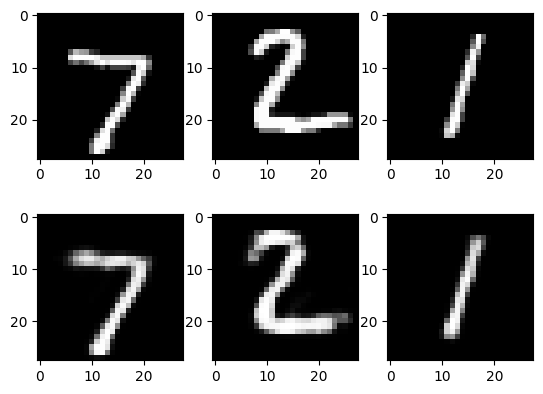

In [ ]:


import matplotlib.pyplot as plt

for i in range (0,3):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test1[i].reshape((28,28)),'gray')
    plt.subplot(2,3,i+4)
    plt.imshow(image_prediction[i].reshape(28, 28),'gray')


In [ ]:

Input_size = 784
Number_Neuron_Hidden_Layer = 128
code_size = 32

# Définir l'encodeur (encoder)
Input_Layer = Input(shape=(Input_size,))
Hidden_Encoder = Dense(Number_Neuron_Hidden_Layer, activation='relu')(Input_Layer)
code = Dense(code_size, activation='relu')(Hidden_Encoder)

encoder = Model(Input_Layer, code)

# Compiler l'encodeur (encoder)
encoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Obtenir les images encodées
encoded_images = encoder.predict(x_test1)
encoded_images.shape


313/313 [==============================] - 2s 5ms/step


(10000, 32)

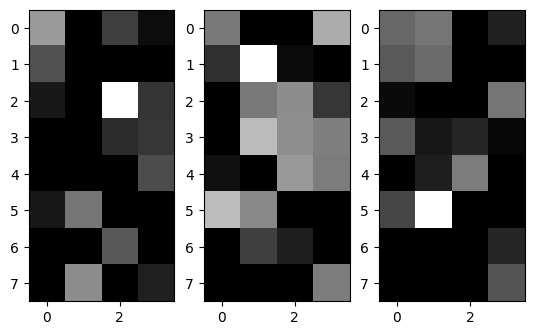

In [ ]:
# Visualisation des images encodées
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(encoded_images[i].reshape((8, 4)), 'gray')

plt.show()